# Plot Recall curve

In [1]:
import sys
sys.path.append('/workspace/')

import json
import numpy as np
from visualize.visualize_results import VisaulizeResults, VisualizeResults

viz = VisualizeResults()
 


In [ ]:

# Load the file
data1 = np.loadtxt('/workspace/data/truckscenes_test/perturbations_file_test_uniform.txt', delimiter=',')
data1[:, :3] = np.degrees(data1[:, :3])
data1 = np.column_stack((np.mean(np.abs(data1[:, :3]), axis=1), np.mean(np.abs(data1[:, 3:]), axis=1)))

data2 = np.loadtxt('data/truckscenes_test/perturbations_file_test_gaussian.txt', delimiter=',')
data2[:, :3] = np.degrees(data2[:, :3])
data2 = np.column_stack((np.mean(np.abs(data2[:, :3]), axis=1), np.mean(np.abs(data2[:, 3:]), axis=1)))

data3 = np.loadtxt('data/truckscenes_test/perturbations_file_test_inv_gaussian.txt', delimiter=',')
data3[:, :3] = np.degrees(data3[:, :3])
data3 = np.column_stack((np.mean(np.abs(data3[:, :3]), axis=1), np.mean(np.abs(data3[:, 3:]), axis=1)))

with open("/workspace/results/Adaption2_ptv3/results_v1.json", "r") as file1:
    data_dict1 = json.load(file1)
data4 = np.asarray(data_dict1["layer_2"]["error_calib"])

data4 = np.column_stack((np.mean(np.abs(data4[:, :3]), axis=1), np.mean(np.abs(data4[:, 3:]), axis=1)))

with open("/workspace/results/Adaption2_ptv3/results_gaussian.json", "r") as file2:
    data_dict2 = json.load(file2)
data5 = np.asarray(data_dict2["layer_2"]["error_calib"])
data5 = np.column_stack((np.mean(np.abs(data5[:, :3]), axis=1), np.mean(np.abs(data5[:, 3:]), axis=1)))

with open("results/Adaption2_ptv3/results_inv_gaussian.json", "r") as file3:
    data_dict3 = json.load(file3)
data6 = np.asarray(data_dict3["layer_2"]["error_calib"])
data6 = np.column_stack((np.mean(np.abs(data6[:, :3]), axis=1), np.mean(np.abs(data6[:, 3:]), axis=1)))

# with open("/workspace/results/Baseline_Hregnet/results.json", "r") as file4:
#     data_dict4 = json.load(file4)

# Comparison between two models

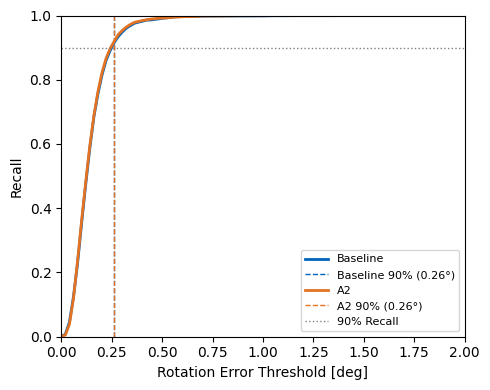

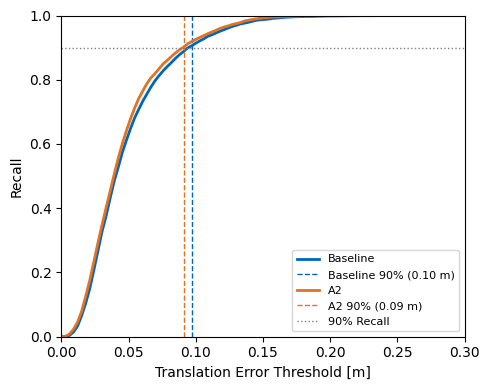

In [3]:
thresholds_rot = np.linspace(0, 2, 100)        # for rotation (0 to 2 degrees)
thresholds_trans = np.linspace(0, 0.3, 100)      # for translation (0 to 0.1 m)

viz.plot_recall_curve(errors1=data4, errors3=data6,
                      thresholds_rot=thresholds_rot,thresholds_trans=thresholds_trans,
                      label1="Baseline",label3= "A2")

# Comparison between layers

In [ ]:
with open("/workspace/results/Adaption2_ptv3/results_v1.json", "r") as file1:
    data_dict1 = json.load(file1)
data_0 = np.asarray(data_dict1["layer_0"]["error_calib"])
data_1 = np.asarray(data_dict1["layer_1"]["error_calib"])
data_2 = np.asarray(data_dict1["layer_2"]["error_calib"])

data_0 = np.column_stack((np.mean(np.abs(data_0[:, :3]), axis=1), np.mean(np.abs(data_0[:, 3:]), axis=1)))
data_1 = np.column_stack((np.mean(np.abs(data_1[:, :3]), axis=1), np.mean(np.abs(data_1[:, 3:]), axis=1)))
data_2 = np.column_stack((np.mean(np.abs(data_2[:, :3]), axis=1), np.mean(np.abs(data_2[:, 3:]), axis=1)))

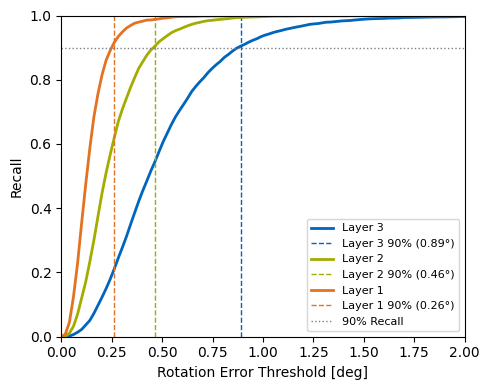

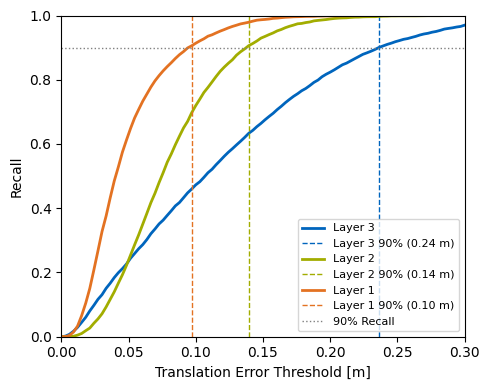

In [4]:
thresholds_rot = np.linspace(0, 2, 100)        # for rotation (0 to 2 degrees)
thresholds_trans = np.linspace(0, 0.3, 100)      # for translation (0 to 0.1 m)

viz.plot_recall_curve(errors1=data_0, errors2=data_1, errors3=data_2,
                      thresholds_rot=thresholds_rot,thresholds_trans=thresholds_trans,
                      label1="Layer 3",label2="Layer 2",label3= "Layer 1")